# expression nearby of int regions, data from vifi, active Vs. inactive

In [1]:
import pandas as pd
import scipy.stats as ss
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pybedtools import BedTool

In [2]:
from statannotations.Annotator import Annotator

In [3]:
commonFontsize=8

def config_rcparams():    
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['arial']
    plt.rcParams['font.size'] = commonFontsize
    plt.rcParams['axes.labelsize'] = commonFontsize
    plt.rcParams['xtick.labelsize'] = commonFontsize
    plt.rcParams['ytick.labelsize'] = commonFontsize
    plt.rcParams['axes.titlesize'] = commonFontsize
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.cal'] = 'arial'
    plt.rcParams['mathtext.rm'] = 'arial' 
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.linewidth'] = 0.7
    plt.rcParams['xtick.major.width'] = 0.7
    plt.rcParams['ytick.major.width'] = 0.7
    plt.rcParams['xtick.major.size' ] = 3
    plt.rcParams['ytick.major.size' ] = 3

config_rcparams()



In [4]:
# hela s3, ROADMAP chromHMM, hg19
hela=pd.read_csv('../dataset/roadmap_chromHMM/E117_15_coreMarks_mnemonics.bed.gz', sep='\t', header=None)
hela

,0,1,2,3
0,chr10,0,119600,15_Quies
1,chr10,119600,120400,1_TssA
2,chr10,120400,122200,14_ReprPCWk
3,chr10,122200,122600,1_TssA
4,chr10,122600,159600,14_ReprPCWk
5,chr10,159600,178800,15_Quies
6,chr10,178800,180000,7_Enh
7,chr10,180000,180600,2_TssAFlnk
8,chr10,180600,182400,1_TssA
9,chr10,182400,183200,2_TssAFlnk


In [5]:
hela[0].value_counts()

chr1     35628
chr2     23948
chr5     22377
chr3     21430
chr12    19554
chr11    19098
chr7     18951
chr6     18671
chr17    18017
chr10    17507
chr9     16690
chr8     16688
chr15    14950
chr19    14461
chr16    13749
chr14    11785
chr20    11396
chr4     11159
chrX     11083
chr18     8163
chr13     7462
chr22     6212
chr21     5057
chrM         5
Name: 0, dtype: int64

In [6]:
print(len(BedTool.from_dataframe(hela).merge()))

24


In [7]:
hela[3].value_counts()

7_Enh          84725
5_TxWk         66358
15_Quies       50243
2_TssAFlnk     41643
14_ReprPCWk    31463
4_Tx           26294
1_TssA         20519
13_ReprPC      18934
9_Het           9189
6_EnhG          7897
3_TxFlnk        3099
8_ZNF/Rpts      1834
12_EnhBiv        835
10_TssBiv        602
11_BivFlnk       406
Name: 3, dtype: int64

In [8]:
#remove numbers in hmm types
hela[3]=hela[3].str.split('_', expand=True)[1]
print(hela[3].value_counts())
hela

Enh         84725
TxWk        66358
Quies       50243
TssAFlnk    41643
ReprPCWk    31463
Tx          26294
TssA        20519
ReprPC      18934
Het          9189
EnhG         7897
TxFlnk       3099
ZNF/Rpts     1834
EnhBiv        835
TssBiv        602
BivFlnk       406
Name: 3, dtype: int64


,0,1,2,3
0,chr10,0,119600,Quies
1,chr10,119600,120400,TssA
2,chr10,120400,122200,ReprPCWk
3,chr10,122200,122600,TssA
4,chr10,122600,159600,ReprPCWk
5,chr10,159600,178800,Quies
6,chr10,178800,180000,Enh
7,chr10,180000,180600,TssAFlnk
8,chr10,180600,182400,TssA
9,chr10,182400,183200,TssAFlnk


In [9]:
def status_hmm(row):
    if row['thickEnd'] in ['TssA', 'TssAFlnk', 'TxFlnk', 'Tx', 'TxWk', 'EnhG', 'Enh', 'ZNF/Rpts']:
        return 'active'
    elif row['thickEnd'] in ['Het', 'TssBiv', 'BivFlnk', 'EnhBiv', 'ReprPC', 'ReprPCWk', 'Quies']:
        return 'inactive' 


In [10]:
#vifi dataset for exp in nearby of integrations
exp_vifi=pd.read_excel('/workspace/incubator/aks/hela_haplotype/dataset/vifi_supp/Supplementary_Tables_.xlsx',\
                      sheet_name='Table 4. Expression data', skiprows=1)
exp_vifi

,Patient,Segment,Type,FPKM,Fusion,mean FPKM of other samples,Fold Change compared to mean FPKM of same region from other samples,Fold change compared to the median of the upperquantile of the FPKM expression data of the sample
0,TCGA-EK-A2RM,chr8:76154371-76154783,All,8.333313,True,1.559638,5.315437,2.618642
1,TCGA-EK-A2RM,chr8:76154371-76154783,Gene,0.000000,True,0.234123,0.040963,0.000000
2,TCGA-EK-A2RM,chr8:76154371-76154783,LINE,8.333313,True,1.559638,5.315437,2.618642
3,TCGA-EK-A2RM,chr8:76154371-76154783,LTR,8.333313,True,1.559638,5.315437,2.618642
4,TCGA-EK-A2RM,chr8:76301293-76301708,All,0.271274,False,0.364832,0.750401,0.085245
5,TCGA-EK-A2RM,chr8:76301293-76301708,LINE,0.271274,False,0.364832,0.750401,0.085245
6,TCGA-EK-A2RM,chr8:76301293-76301708,LTR,0.271274,False,0.364832,0.750401,0.085245
7,TCGA-C5-A3HE,chr8:128865725-128866150,All,3.454168,True,5.600106,0.617487,1.282930
8,TCGA-C5-A3HE,chr8:128865725-128866150,Gene,3.454168,True,5.600106,0.617487,1.282930
9,TCGA-C5-A3HE,chr8:128865725-128866150,LINE,3.454168,True,5.600106,0.617487,1.282930


In [11]:
# add chr and pos columns
exp_vifi['chr']=exp_vifi['Segment'].str.split(':', expand=True)[0]
exp_vifi['str']=exp_vifi['Segment'].str.split(':', expand=True)[1].str.split('-', expand=True)[0]
exp_vifi['end']=exp_vifi['Segment'].str.split(':', expand=True)[1].str.split('-', expand=True)[1]
exp_vifi


,Patient,Segment,Type,FPKM,Fusion,mean FPKM of other samples,Fold Change compared to mean FPKM of same region from other samples,Fold change compared to the median of the upperquantile of the FPKM expression data of the sample,chr,str,end
0,TCGA-EK-A2RM,chr8:76154371-76154783,All,8.333313,True,1.559638,5.315437,2.618642,chr8,76154371,76154783
1,TCGA-EK-A2RM,chr8:76154371-76154783,Gene,0.000000,True,0.234123,0.040963,0.000000,chr8,76154371,76154783
2,TCGA-EK-A2RM,chr8:76154371-76154783,LINE,8.333313,True,1.559638,5.315437,2.618642,chr8,76154371,76154783
3,TCGA-EK-A2RM,chr8:76154371-76154783,LTR,8.333313,True,1.559638,5.315437,2.618642,chr8,76154371,76154783
4,TCGA-EK-A2RM,chr8:76301293-76301708,All,0.271274,False,0.364832,0.750401,0.085245,chr8,76301293,76301708
5,TCGA-EK-A2RM,chr8:76301293-76301708,LINE,0.271274,False,0.364832,0.750401,0.085245,chr8,76301293,76301708
6,TCGA-EK-A2RM,chr8:76301293-76301708,LTR,0.271274,False,0.364832,0.750401,0.085245,chr8,76301293,76301708
7,TCGA-C5-A3HE,chr8:128865725-128866150,All,3.454168,True,5.600106,0.617487,1.282930,chr8,128865725,128866150
8,TCGA-C5-A3HE,chr8:128865725-128866150,Gene,3.454168,True,5.600106,0.617487,1.282930,chr8,128865725,128866150
9,TCGA-C5-A3HE,chr8:128865725-128866150,LINE,3.454168,True,5.600106,0.617487,1.282930,chr8,128865725,128866150


In [12]:
print(list(exp_vifi))

['Patient', 'Segment', 'Type', 'FPKM', 'Fusion', 'mean FPKM of other samples', 'Fold Change compared to mean FPKM of same region from other samples', 'Fold change compared to the median of the upperquantile of the FPKM expression data of the sample', 'chr', 'str', 'end']


In [13]:
#rearrange cols
exp_vifi=exp_vifi[['chr', 'str', 'end', 'Patient', 'Segment', 'Type', 'FPKM', 'Fusion', \
                   'mean FPKM of other samples',\
                   'Fold Change compared to mean FPKM of same region from other samples', 
                   'Fold change compared to the median of the upperquantile of the FPKM expression data of the sample']]
exp_vifi
                  

,chr,str,end,Patient,Segment,Type,FPKM,Fusion,mean FPKM of other samples,Fold Change compared to mean FPKM of same region from other samples,Fold change compared to the median of the upperquantile of the FPKM expression data of the sample
0,chr8,76154371,76154783,TCGA-EK-A2RM,chr8:76154371-76154783,All,8.333313,True,1.559638,5.315437,2.618642
1,chr8,76154371,76154783,TCGA-EK-A2RM,chr8:76154371-76154783,Gene,0.000000,True,0.234123,0.040963,0.000000
2,chr8,76154371,76154783,TCGA-EK-A2RM,chr8:76154371-76154783,LINE,8.333313,True,1.559638,5.315437,2.618642
3,chr8,76154371,76154783,TCGA-EK-A2RM,chr8:76154371-76154783,LTR,8.333313,True,1.559638,5.315437,2.618642
4,chr8,76301293,76301708,TCGA-EK-A2RM,chr8:76301293-76301708,All,0.271274,False,0.364832,0.750401,0.085245
5,chr8,76301293,76301708,TCGA-EK-A2RM,chr8:76301293-76301708,LINE,0.271274,False,0.364832,0.750401,0.085245
6,chr8,76301293,76301708,TCGA-EK-A2RM,chr8:76301293-76301708,LTR,0.271274,False,0.364832,0.750401,0.085245
7,chr8,128865725,128866150,TCGA-C5-A3HE,chr8:128865725-128866150,All,3.454168,True,5.600106,0.617487,1.282930
8,chr8,128865725,128866150,TCGA-C5-A3HE,chr8:128865725-128866150,Gene,3.454168,True,5.600106,0.617487,1.282930
9,chr8,128865725,128866150,TCGA-C5-A3HE,chr8:128865725-128866150,LINE,3.454168,True,5.600106,0.617487,1.282930


In [14]:
print(exp_vifi['Patient'].nunique())
exp_vifi['Patient'].value_counts()

51


TCGA-C5-A2LX    70
TCGA-EK-A2R9    53
TCGA-C5-A3HE    28
TCGA-C5-A1ML    25
TCGA-EA-A3QD    24
TCGA-C5-A2M1    23
TCGA-C5-A3HD    20
TCGA-JX-A3PZ    19
TCGA-DS-A0VL    16
TCGA-EK-A2RL    16
TCGA-FU-A3NI    15
TCGA-EA-A3HQ    14
TCGA-C5-A1M9    12
TCGA-EA-A3QE    12
TCGA-EK-A2R8    10
TCGA-C5-A1MQ     9
TCGA-EK-A3GJ     8
TCGA-C5-A2LY     8
TCGA-C5-A1MI     8
TCGA-C5-A1M8     8
TCGA-EA-A3HR     8
TCGA-IR-A3LK     8
TCGA-JX-A3Q0     8
TCGA-C5-A2LT     8
TCGA-EA-A1QS     8
TCGA-DG-A2KJ     8
TCGA-EK-A2RM     7
TCGA-EK-A3GN     7
TCGA-EK-A3GM     7
TCGA-IR-A3LC     6
TCGA-C5-A1BN     6
TCGA-C5-A3HF     5
TCGA-C5-A1BJ     5
TCGA-FU-A3YQ     4
TCGA-C5-A2LV     4
TCGA-EX-A1H6     4
TCGA-FU-A3WB     4
TCGA-C5-A0TN     4
TCGA-IR-A3L7     4
TCGA-EK-A2RE     4
TCGA-FU-A3HY     4
TCGA-FU-A3TX     4
TCGA-IR-A3LH     4
TCGA-C5-A2LZ     4
TCGA-EK-A2PL     4
TCGA-EK-A2R7     4
TCGA-HM-A3JK     4
TCGA-EX-A3L1     3
TCGA-C5-A1BF     1
TCGA-EA-A3Y4     1
TCGA-EA-A3HU     1
Name: Patient, dtype: int64

In [15]:
exp_vifi['Segment'].nunique()

181

In [16]:
exp_vifi['Type'].value_counts()

All         181
LINE        133
LTR         124
Gene        108
Oncogene      5
Name: Type, dtype: int64

In [17]:
for item in exp_vifi['Type'].unique().tolist():
    print(item)
    print(len(exp_vifi[exp_vifi['Type']==item]))
    print(exp_vifi[exp_vifi['Type']==item]['Segment'].nunique())

    

All
181
181
Gene
108
108
LINE
133
133
LTR
124
124
Oncogene
5
5


In [18]:
#check no of unique sites in each sample
print(len(exp_vifi.drop_duplicates(subset=['Patient', 'Segment'], keep='first')))
print(exp_vifi.drop_duplicates(subset=['Patient', 'Segment'], keep='first')['Patient'].value_counts())


181
TCGA-C5-A2LX    27
TCGA-EK-A2R9    20
TCGA-DS-A0VL    10
TCGA-EA-A3QD     9
TCGA-C5-A1ML     8
TCGA-FU-A3NI     7
TCGA-JX-A3PZ     7
TCGA-C5-A3HE     7
TCGA-C5-A2M1     6
TCGA-EK-A2RL     5
TCGA-C5-A3HD     5
TCGA-EA-A3HQ     4
TCGA-C5-A1M9     3
TCGA-C5-A1MQ     3
TCGA-EA-A3QE     3
TCGA-EK-A3GM     2
TCGA-EA-A1QS     2
TCGA-C5-A0TN     2
TCGA-C5-A1BN     2
TCGA-C5-A1MI     2
TCGA-C5-A1M8     2
TCGA-EK-A3GN     2
TCGA-FU-A3HY     2
TCGA-EK-A2RE     2
TCGA-DG-A2KJ     2
TCGA-JX-A3Q0     2
TCGA-EK-A3GJ     2
TCGA-EK-A2RM     2
TCGA-EA-A3HR     2
TCGA-C5-A2LT     2
TCGA-IR-A3LK     2
TCGA-C5-A3HF     2
TCGA-C5-A1BJ     2
TCGA-IR-A3LC     2
TCGA-EK-A2R8     2
TCGA-C5-A2LY     2
TCGA-EK-A2R7     1
TCGA-EX-A1H6     1
TCGA-FU-A3YQ     1
TCGA-EK-A2PL     1
TCGA-C5-A2LZ     1
TCGA-C5-A2LV     1
TCGA-EX-A3L1     1
TCGA-FU-A3WB     1
TCGA-IR-A3LH     1
TCGA-EA-A3HU     1
TCGA-C5-A1BF     1
TCGA-EA-A3Y4     1
TCGA-IR-A3L7     1
TCGA-FU-A3TX     1
TCGA-HM-A3JK     1
Name: Patient, dtype: int64

In [19]:
exp_vifi['str']=exp_vifi['str'].astype('int64')
exp_vifi['end']=exp_vifi['end'].astype('int64')
exp_vifi

,chr,str,end,Patient,Segment,Type,FPKM,Fusion,mean FPKM of other samples,Fold Change compared to mean FPKM of same region from other samples,Fold change compared to the median of the upperquantile of the FPKM expression data of the sample
0,chr8,76154371,76154783,TCGA-EK-A2RM,chr8:76154371-76154783,All,8.333313,True,1.559638,5.315437,2.618642
1,chr8,76154371,76154783,TCGA-EK-A2RM,chr8:76154371-76154783,Gene,0.000000,True,0.234123,0.040963,0.000000
2,chr8,76154371,76154783,TCGA-EK-A2RM,chr8:76154371-76154783,LINE,8.333313,True,1.559638,5.315437,2.618642
3,chr8,76154371,76154783,TCGA-EK-A2RM,chr8:76154371-76154783,LTR,8.333313,True,1.559638,5.315437,2.618642
4,chr8,76301293,76301708,TCGA-EK-A2RM,chr8:76301293-76301708,All,0.271274,False,0.364832,0.750401,0.085245
5,chr8,76301293,76301708,TCGA-EK-A2RM,chr8:76301293-76301708,LINE,0.271274,False,0.364832,0.750401,0.085245
6,chr8,76301293,76301708,TCGA-EK-A2RM,chr8:76301293-76301708,LTR,0.271274,False,0.364832,0.750401,0.085245
7,chr8,128865725,128866150,TCGA-C5-A3HE,chr8:128865725-128866150,All,3.454168,True,5.600106,0.617487,1.282930
8,chr8,128865725,128866150,TCGA-C5-A3HE,chr8:128865725-128866150,Gene,3.454168,True,5.600106,0.617487,1.282930
9,chr8,128865725,128866150,TCGA-C5-A3HE,chr8:128865725-128866150,LINE,3.454168,True,5.600106,0.617487,1.282930


In [20]:
exp_vifi[exp_vifi['chr']=='chrY']

,chr,str,end,Patient,Segment,Type,FPKM,Fusion,mean FPKM of other samples,Fold Change compared to mean FPKM of same region from other samples,Fold change compared to the median of the upperquantile of the FPKM expression data of the sample
140,chrY,59342866,59343194,TCGA-EA-A3QD,chrY:59342866-59343194,All,0.000000,True,0.000000,1.000000,0.000000
206,chrY,1531641,1531858,TCGA-FU-A3NI,chrY:1531641-1531858,All,1.682417,False,1.176668,1.426193,0.638782
207,chrY,1531641,1531858,TCGA-FU-A3NI,chrY:1531641-1531858,Gene,1.682417,False,1.176668,1.426193,0.638782
208,chrY,1531641,1531858,TCGA-FU-A3NI,chrY:1531641-1531858,LTR,1.682417,False,1.176668,1.426193,0.638782
527,chrY,13458361,13458713,TCGA-DS-A0VL,chrY:13458361-13458713,All,0.000000,False,0.000000,1.000000,0.000000


In [21]:
#take center
exp_vifi['end']=(exp_vifi['str']+exp_vifi['end'])/2
exp_vifi['end']=exp_vifi['end'].astype('int64')
exp_vifi['str']=exp_vifi['end']-1
exp_vifi

,chr,str,end,Patient,Segment,Type,FPKM,Fusion,mean FPKM of other samples,Fold Change compared to mean FPKM of same region from other samples,Fold change compared to the median of the upperquantile of the FPKM expression data of the sample
0,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,All,8.333313,True,1.559638,5.315437,2.618642
1,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,Gene,0.000000,True,0.234123,0.040963,0.000000
2,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,LINE,8.333313,True,1.559638,5.315437,2.618642
3,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,LTR,8.333313,True,1.559638,5.315437,2.618642
4,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,All,0.271274,False,0.364832,0.750401,0.085245
5,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,LINE,0.271274,False,0.364832,0.750401,0.085245
6,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,LTR,0.271274,False,0.364832,0.750401,0.085245
7,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,All,3.454168,True,5.600106,0.617487,1.282930
8,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,Gene,3.454168,True,5.600106,0.617487,1.282930
9,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,LINE,3.454168,True,5.600106,0.617487,1.282930


In [22]:
#merge exp_vifi with hela hmm
exp_vifi_hela=BedTool.from_dataframe(exp_vifi).intersect(BedTool.from_dataframe(hela),loj=True)
exp_vifi_hela=BedTool.to_dataframe(exp_vifi_hela)
exp_vifi_hela

/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 15 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,All,8.333313,True,1.559638,5.315437,2.618642,chr8,75913000,76242600,Quies
1,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,Gene,0.000000,True,0.234123,0.040963,0.000000,chr8,75913000,76242600,Quies
2,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,LINE,8.333313,True,1.559638,5.315437,2.618642,chr8,75913000,76242600,Quies
3,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,LTR,8.333313,True,1.559638,5.315437,2.618642,chr8,75913000,76242600,Quies
4,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,All,0.271274,False,0.364832,0.750401,0.085245,chr8,76243400,76319200,Quies
5,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,LINE,0.271274,False,0.364832,0.750401,0.085245,chr8,76243400,76319200,Quies
6,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,LTR,0.271274,False,0.364832,0.750401,0.085245,chr8,76243400,76319200,Quies
7,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,All,3.454168,True,5.600106,0.617487,1.282930,chr8,128865400,128867000,TssAFlnk
8,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,Gene,3.454168,True,5.600106,0.617487,1.282930,chr8,128865400,128867000,TssAFlnk
9,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,LINE,3.454168,True,5.600106,0.617487,1.282930,chr8,128865400,128867000,TssAFlnk


In [23]:
exp_vifi_hela[14].value_counts()

Quies       272
TxWk         81
Tx           50
ReprPCWk     41
Enh          22
EnhG         20
TssAFlnk     16
TssA         13
ZNF/Rpts     12
Het           6
BivFlnk       5
.             5
TssBiv        4
ReprPC        4
Name: 14, dtype: int64

In [24]:
exp_vifi_hela[exp_vifi_hela[14]=='.']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
140,chrY,59343029,59343030,TCGA-EA-A3QD,chrY:59342866-59343194,All,0.000000,True,0.000000,1.000000,0.000000,.,-1,-1,.
206,chrY,1531748,1531749,TCGA-FU-A3NI,chrY:1531641-1531858,All,1.682417,False,1.176668,1.426193,0.638782,.,-1,-1,.
207,chrY,1531748,1531749,TCGA-FU-A3NI,chrY:1531641-1531858,Gene,1.682417,False,1.176668,1.426193,0.638782,.,-1,-1,.
208,chrY,1531748,1531749,TCGA-FU-A3NI,chrY:1531641-1531858,LTR,1.682417,False,1.176668,1.426193,0.638782,.,-1,-1,.
527,chrY,13458536,13458537,TCGA-DS-A0VL,chrY:13458361-13458713,All,0.000000,False,0.000000,1.000000,0.000000,.,-1,-1,.


In [25]:
#remove which dosent overlap
exp_vifi_hela=exp_vifi_hela[exp_vifi_hela[12]!=-1]
exp_vifi_hela=exp_vifi_hela.rename(columns={14:'thickEnd'})
exp_vifi_hela

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,thickEnd
0,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,All,8.333313,True,1.559638,5.315437,2.618642,chr8,75913000,76242600,Quies
1,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,Gene,0.000000,True,0.234123,0.040963,0.000000,chr8,75913000,76242600,Quies
2,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,LINE,8.333313,True,1.559638,5.315437,2.618642,chr8,75913000,76242600,Quies
3,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,LTR,8.333313,True,1.559638,5.315437,2.618642,chr8,75913000,76242600,Quies
4,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,All,0.271274,False,0.364832,0.750401,0.085245,chr8,76243400,76319200,Quies
5,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,LINE,0.271274,False,0.364832,0.750401,0.085245,chr8,76243400,76319200,Quies
6,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,LTR,0.271274,False,0.364832,0.750401,0.085245,chr8,76243400,76319200,Quies
7,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,All,3.454168,True,5.600106,0.617487,1.282930,chr8,128865400,128867000,TssAFlnk
8,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,Gene,3.454168,True,5.600106,0.617487,1.282930,chr8,128865400,128867000,TssAFlnk
9,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,LINE,3.454168,True,5.600106,0.617487,1.282930,chr8,128865400,128867000,TssAFlnk


In [26]:
# group hela hmm into two categories
exp_vifi_hela['type']=exp_vifi_hela.apply(status_hmm, axis=1)
print(exp_vifi_hela['type'].value_counts())
exp_vifi_hela

inactive    332
active      214
Name: type, dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,thickEnd,type
0,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,All,8.333313,True,1.559638,5.315437,2.618642,chr8,75913000,76242600,Quies,inactive
1,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,Gene,0.000000,True,0.234123,0.040963,0.000000,chr8,75913000,76242600,Quies,inactive
2,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,LINE,8.333313,True,1.559638,5.315437,2.618642,chr8,75913000,76242600,Quies,inactive
3,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,LTR,8.333313,True,1.559638,5.315437,2.618642,chr8,75913000,76242600,Quies,inactive
4,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,All,0.271274,False,0.364832,0.750401,0.085245,chr8,76243400,76319200,Quies,inactive
5,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,LINE,0.271274,False,0.364832,0.750401,0.085245,chr8,76243400,76319200,Quies,inactive
6,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,LTR,0.271274,False,0.364832,0.750401,0.085245,chr8,76243400,76319200,Quies,inactive
7,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,All,3.454168,True,5.600106,0.617487,1.282930,chr8,128865400,128867000,TssAFlnk,active
8,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,Gene,3.454168,True,5.600106,0.617487,1.282930,chr8,128865400,128867000,TssAFlnk,active
9,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,LINE,3.454168,True,5.600106,0.617487,1.282930,chr8,128865400,128867000,TssAFlnk,active


In [27]:
# convert values to log2
exp_vifi_hela[6]=np.log2(exp_vifi_hela[6]+1)
exp_vifi_hela[8]=np.log2(exp_vifi_hela[8]+1)
exp_vifi_hela[9]=np.log2(exp_vifi_hela[9]+1)
exp_vifi_hela

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,thickEnd,type
0,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,All,3.222389,True,1.355940,2.658883,2.618642,chr8,75913000,76242600,Quies,inactive
1,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,Gene,0.000000,True,0.303486,0.057919,0.000000,chr8,75913000,76242600,Quies,inactive
2,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,LINE,3.222389,True,1.355940,2.658883,2.618642,chr8,75913000,76242600,Quies,inactive
3,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,LTR,3.222389,True,1.355940,2.658883,2.618642,chr8,75913000,76242600,Quies,inactive
4,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,All,0.346275,False,0.448723,0.807685,0.085245,chr8,76243400,76319200,Quies,inactive
5,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,LINE,0.346275,False,0.448723,0.807685,0.085245,chr8,76243400,76319200,Quies,inactive
6,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,LTR,0.346275,False,0.448723,0.807685,0.085245,chr8,76243400,76319200,Quies,inactive
7,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,All,2.155156,True,2.722489,0.693754,1.282930,chr8,128865400,128867000,TssAFlnk,active
8,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,Gene,2.155156,True,2.722489,0.693754,1.282930,chr8,128865400,128867000,TssAFlnk,active
9,chr8,128865936,128865937,TCGA-C5-A3HE,chr8:128865725-128866150,LINE,2.155156,True,2.722489,0.693754,1.282930,chr8,128865400,128867000,TssAFlnk,active


In [28]:
#6 =FPKM
#8 =mean FPKM of other samples
#9 = Fold Change compared to mean FPKM of same region from other samples


In [29]:
exp_vifi_hela.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,thickEnd,type
0,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,All,3.222389,True,1.355940,2.658883,2.618642,chr8,75913000,76242600,Quies,inactive
1,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,Gene,0.000000,True,0.303486,0.057919,0.000000,chr8,75913000,76242600,Quies,inactive
2,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,LINE,3.222389,True,1.355940,2.658883,2.618642,chr8,75913000,76242600,Quies,inactive
3,chr8,76154576,76154577,TCGA-EK-A2RM,chr8:76154371-76154783,LTR,3.222389,True,1.355940,2.658883,2.618642,chr8,75913000,76242600,Quies,inactive
4,chr8,76301499,76301500,TCGA-EK-A2RM,chr8:76301293-76301708,All,0.346275,False,0.448723,0.807685,0.085245,chr8,76243400,76319200,Quies,inactive


In [30]:
# remove one sample which is labeled outlier and count active and inactive
a=exp_vifi_hela[~exp_vifi_hela[3].isin(['TCGA-C5-A2LX'])]
print(len(a))
for item in a[5].unique().tolist():
    print(item)
    print(len(a[a[5]==item]))
    print(a[a[5]==item]['type'].value_counts())

476
All
151
inactive    97
active      54
Name: type, dtype: int64
Gene
93
inactive    50
active      43
Name: type, dtype: int64
LINE
116
inactive    69
active      47
Name: type, dtype: int64
LTR
112
inactive    68
active      44
Name: type, dtype: int64
Oncogene
4
inactive    2
active      2
Name: type, dtype: int64


In [31]:
g=a[a[5]=='All']
print(len(g))

#compare 6 across inactive and active, after removing one outlier sample, for 'All'
print(ss.mannwhitneyu(g[g['type']=='active'][6], g[g['type']=='inactive'][6], alternative='two-sided'))

#compare 8 across inactive and active, after removing one outlier sample, for 'All'
print(ss.mannwhitneyu(g[g['type']=='active'][8], g[g['type']=='inactive'][8], alternative='two-sided'))

#compare 6 and 8 for active and inactive, after removing one outlier sample, for 'All'
print(ss.mannwhitneyu(g[g['type']=='active'][6], g[g['type']=='active'][8], alternative='two-sided'))
print(ss.mannwhitneyu(g[g['type']=='inactive'][6], g[g['type']=='inactive'][8], alternative='two-sided'))


151
MannwhitneyuResult(statistic=3110.0, pvalue=0.055058477199596556)
MannwhitneyuResult(statistic=3575.5, pvalue=0.00019206196463949493)
MannwhitneyuResult(statistic=1916.5, pvalue=0.004861139710256023)
MannwhitneyuResult(statistic=5755.0, pvalue=0.006528201758731221)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

active_6 vs. active_8: p=0.0048
inactive_6 vs. inactive_8: p=0.0065
inactive_6 vs. active_6: p=0.055
inactive_8 vs. active_8: p=0.00019


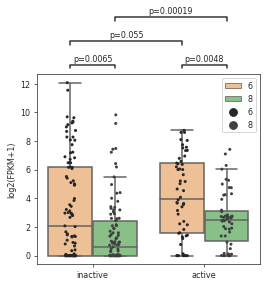

In [32]:
#plot 6 and 8 in All, HeLa hmm
# after removing the outlier sample
sns.set_style(style='ticks')
plt.figure(figsize=(4,3.5))

pairs=[[('active', 6),  ('active', 8)],
      [('inactive', 6), ('inactive', 8)],
      [('inactive', 6), ('active', 6)],
      [('inactive', 8), ('active', 8)]]
       

pvalues=['p=0.0048', 'p=0.0065', 'p=0.055', 'p=0.00019']


    
ax=sns.boxplot(x='type', y='value', hue='variable',\
                data=pd.melt(a[a[5]=='All'], id_vars=['type'], value_vars=[6,8]), \
                showfliers=False, palette=['#fdc086', '#7fc97f'])
sns.stripplot(x='type', y='value', hue='variable',\
                data=pd.melt(a[a[5]=='All'], id_vars=['type'], value_vars=[6,8]), \
                 dodge=True, color='.25', size=3)

# Add annotations
annotator = Annotator(ax, pairs, x='type', y='value', hue='variable',\
                data=pd.melt(a[a[5]=='All'], id_vars=['type'], value_vars=[6,8]), \
                showfliers=False, palette=['#fdc086', '#7fc97f'])
annotator.configure(loc='outside')
annotator.set_custom_annotations(pvalues)
annotator.annotate()

plt.ylabel('log2(FPKM+1)')
plt.xlabel('')
plt.legend(loc=0)
#plt.savefig('../figs/fig2/hela_neighbouring_all.svg', bbox_inches='tight')

In [33]:
#

In [34]:
a.shape

(476, 16)

In [35]:
a[a[5]=='All'][3].value_counts().to_frame()

,3
TCGA-EK-A2R9,20
TCGA-DS-A0VL,9
TCGA-C5-A1ML,8
TCGA-EA-A3QD,8
TCGA-JX-A3PZ,7
TCGA-C5-A3HE,7
TCGA-FU-A3NI,6
TCGA-C5-A2M1,6
TCGA-EK-A2RL,5
TCGA-C5-A3HD,5


Text(0.5, 0, 'No of integrations')

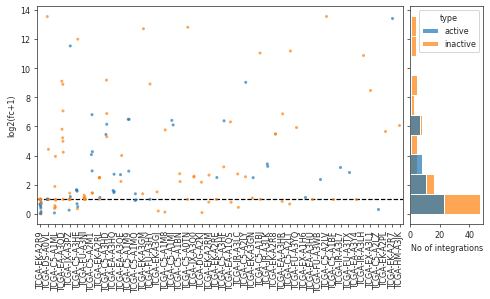

In [36]:
# plot these two plots together using subplots
# plot sample wise exp fc (active-inactive), ordered by no of integrations in a sample
# ONLY FOR  ALL
#for hela chromHMM
# one outlier sample removed

fig, ax=plt.subplots(1, 2, figsize=(8,4), gridspec_kw={'width_ratios': [5, 1], 'wspace':0.03}, sharey=True)

sns.stripplot(x=3, y=9, hue='type', data=a[a[5]=='All'],  order=a[a[5]=='All'][3].value_counts().to_frame().index, \
              hue_order=['active', 'inactive'], size=3, alpha=0.7, ax=ax[0])
ax[0].set_ylabel('log2(fc+1)')
ax[0].set_xlabel('')
ax[0].tick_params('x', labelrotation=90)
ax[0].get_legend().set_visible(False)
ax[0].axhline(1, ls='--', lw=1.2, color='black')

sns.histplot(data=a[a[5]=='All'], y=9, hue='type', hue_order=['active', 'inactive'], alpha=0.7, ax=ax[1])
#ax[1].tick_params(labelleft=True)
ax[1].set_xlabel('No of integrations')

#plt.savefig('../figs/fig2/hela_neighbouring_fc.svg', bbox_inches='tight')



In [37]:
####